## Challenge 2
<div class="alert alert-warning">
Defining an "adopted user" as a user who has logged into the product on 3 separate days in at least one consecutive week (7 days), identify which factors predict future user adoption.

</div>

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
user_engagement_df = pd.read_csv("./data/user_engagement.csv")

# This file is not in UTF-8 encoding but apparently latin-1 encoding works.
# NOTE : This file might not be even in latin-1 encoding. It worked and I decided to stick with it.
users_df = pd.read_csv('./data/users.csv',encoding='latin-1')

In [3]:
user_engagement_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [4]:
user_engagement_df = user_engagement_df.set_index(pd.to_datetime(user_engagement_df['time_stamp']))[['user_id', 'visited']]

In [5]:
user_engagement_df

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [6]:
user_engagement_df_changed = user_engagement_df.groupby('user_id').resample('1W').sum()

In [7]:
user_engagement_df_filtered = user_engagement_df_changed[user_engagement_df_changed['visited']>=3]
user_engagement_df_filtered['user_id'] = [i[0] for i in user_engagement_df_filtered.index]

C:\Users\nisha\AppData\Local\Temp\ipykernel_11204\681149713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_engagement_df_filtered['user_id'] = [i[0] for i in user_engagement_df_filtered.index]


In [59]:
adopted_users = pd.DataFrame({'Adopted User Id' : user_engagement_df_filtered['user_id'].unique()})
adopted_users['Adopted User?'] = 1

In [60]:
adopted_users

,Adopted User Id,Adopted User?
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1
...,...,...
1440,11965,1
1441,11967,1
1442,11969,1
1443,11975,1


In [61]:
user_engagement_df['user_id'].nunique()

8823

<div class="alert alert-success">
<strong>
    There are about 1445 adopted users out of the total 8823 users.
</strong>
</div>

In [62]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,9/6/2013 6:14,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,1/10/2013 18:28,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,4/27/2014 12:45,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,5/31/2012 11:55,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [63]:
adoptedUsers = adopted_users.merge(users_df, left_on = "Adopted User Id", right_on = "object_id", how = "right")

In [64]:
adoptedUsers['Adopted User?'] = adoptedUsers['Adopted User?'].fillna(0)

In [65]:
# Drop useless columns
adoptedUsers = adoptedUsers.drop(['Adopted User Id', 'email', 'creation_time', 'name', 'last_session_creation_time'], axis = 1)

In [66]:
adoptedUsers['invited_by_user_id'] = adoptedUsers['invited_by_user_id'].fillna(-1) 

In [67]:
adoptedUsers['invited_by_user?'] = (adoptedUsers['invited_by_user_id'] >= 0).astype(int)

In [68]:
# Drop invited user id
adoptedUsers = adoptedUsers.drop(['invited_by_user_id'], axis = 1)

In [69]:
adoptedUsers

,Adopted User?,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user?
0,0.0,1,GUEST_INVITE,1,0,11,1
1,1.0,2,ORG_INVITE,0,0,1,1
2,0.0,3,ORG_INVITE,0,0,94,1
3,0.0,4,GUEST_INVITE,0,0,1,1
4,0.0,5,GUEST_INVITE,0,0,193,1
...,...,...,...,...,...,...,...
11995,0.0,11996,ORG_INVITE,0,0,89,1
11996,0.0,11997,SIGNUP_GOOGLE_AUTH,0,0,200,0
11997,0.0,11998,GUEST_INVITE,1,1,83,1
11998,0.0,11999,PERSONAL_PROJECTS,0,0,6,0


<div class="alert alert-info">
Since, both creation_source and org_id is categorical and numerical data we will make use of one-hot encoding to represent them. Individually these values do not really mean anything or compare in anyway.
</div>

### One Hot Encoding on creation_source

In [70]:
a = adoptedUsers['creation_source'].unique()

In [71]:
for i in a:
    adoptedUsers['creation_source_' + i] = (adoptedUsers['creation_source'] == i).astype(int)

### One Hot Encoding on org_id

In [72]:
a = adoptedUsers['org_id'].unique()
a

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

<div class="alert alert-danger">
There are too many values. Let's look at this data a bit furthur to get a better sense of what we are working with.
</div>

In [73]:
g = adoptedUsers.groupby('org_id').sum()

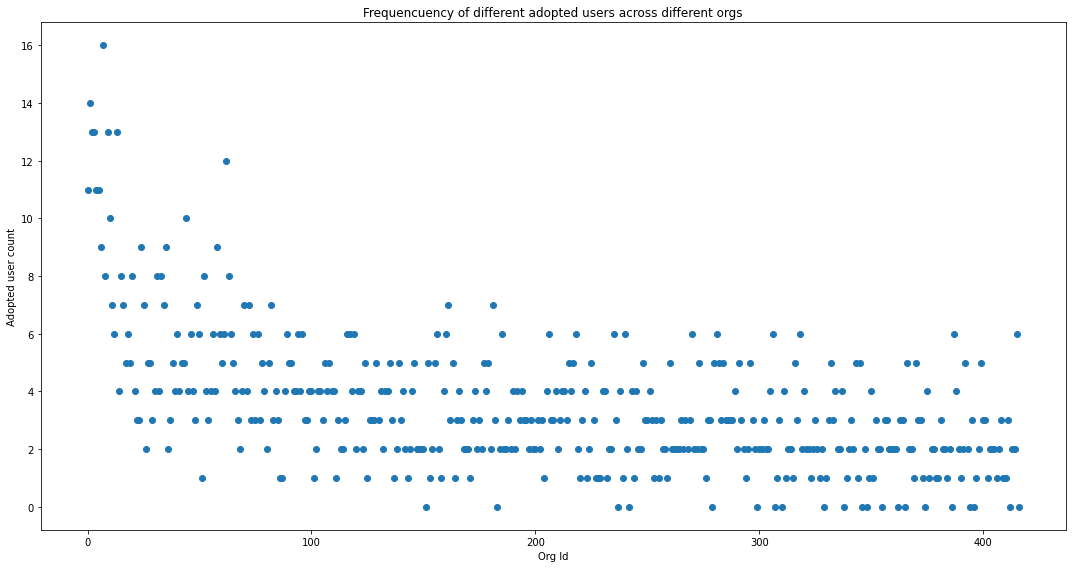

In [74]:
fig, ax = plt.subplots(figsize = (15,8))
plt.rcParams["figure.autolayout"] = True
plt.scatter(g.index, g['Adopted User?'])
plt.xlabel("Org Id")
plt.title("Frequencuency of different adopted users across different orgs")
plt.ylabel("Adopted user count")
plt.show()

<div class="alert alert-info">
It seems like the number of adopted users across various organization is spread out but quite a lot. Hence, accounting for this information might not provide any valuable information as the data is too varied. Therefore, we will drop this column and focus on the rest of the columns.
</div>

In [75]:
# Dorp the final set of columns
adoptedUsers = adoptedUsers.drop(['object_id', 'creation_source', 'org_id'], axis = 1)

In [76]:
adoptedUsers

,Adopted User?,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user?,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_SIGNUP,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP_GOOGLE_AUTH
0,0.0,1,0,1,1,0,0,0,0
1,1.0,0,0,1,0,1,0,0,0
2,0.0,0,0,1,0,1,0,0,0
3,0.0,0,0,1,1,0,0,0,0
4,0.0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11995,0.0,0,0,1,0,1,0,0,0
11996,0.0,0,0,0,0,0,0,0,1
11997,0.0,1,1,1,1,0,0,0,0
11998,0.0,0,0,0,0,0,0,1,0


<div class="alert alert-info">
Since, this is a binary classification question, we could make use of something like Logistic Regression to train the model and see which features the model found useful. In addition, will also train the data using Gradient Boosting classifier to check feature importance. There is no need to standarize the data as the value is 0 or 1.
</div>

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
original = adoptedUsers.copy()
y = adoptedUsers.pop('Adopted User?')
x = adoptedUsers

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [80]:
rf = GradientBoostingClassifier(n_estimators=250)
rf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=250)

In [81]:
a = rf.score(X_test, y_test)
print("The accuracy of GradientBoostingClassifier is : " + str(a * 100) + "%. But this does not really tell us anything, since the data was not divided evenly.")

The accuracy of GradientBoostingClassifier is : 88.02777777777779%. But this does not really tell us anything, since the data was not divided evenly.


In [82]:
sort = rf.feature_importances_.argsort()

In [83]:
sort

array([2, 3, 7, 5, 1, 0, 4, 6], dtype=int64)

Text(0.5, 0, 'Feature Importance')

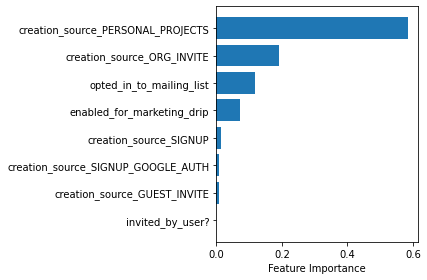

In [84]:
plt.barh(adoptedUsers.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [85]:
lg = LogisticRegression()

In [86]:
lg.fit(X_train, y_train)

LogisticRegression()

In [87]:
a = lg.score(X_test, y_test)
print("The accuracy of GradientBoostingClassifier is : " + str(a * 100) + "%")

The accuracy of GradientBoostingClassifier is : 88.02777777777779%


In [88]:
feature_importance = abs(lg.coef_[0])

In [89]:
feature_importance

array([0.12233759, 0.07470633, 0.09324088, 0.20734133, 0.11410046,
       0.20638586, 0.57359649, 0.27370871])

In [90]:
sorted_idx = np.argsort(feature_importance)

In [91]:
sorted_idx

array([1, 2, 4, 0, 5, 3, 7, 6], dtype=int64)

Text(0.5, 0, 'Feature Importance')

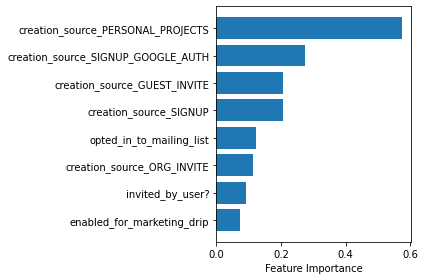

In [92]:
plt.barh(adoptedUsers.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")

<div class="alert alert-success">
Interesting the accuracy of both the models is the same (not that the accuracy matters in this case due to the uneven division of data). But, what we find intersting is with the feature importance ranking which interestly for both models shows the 'creation_source_PERSONAL_PROJECTS' feature has the highest importance. The rest of the features seems to vary between the two models. This again would require furthur exploration as it is unclear.
</div>

<AxesSubplot:>

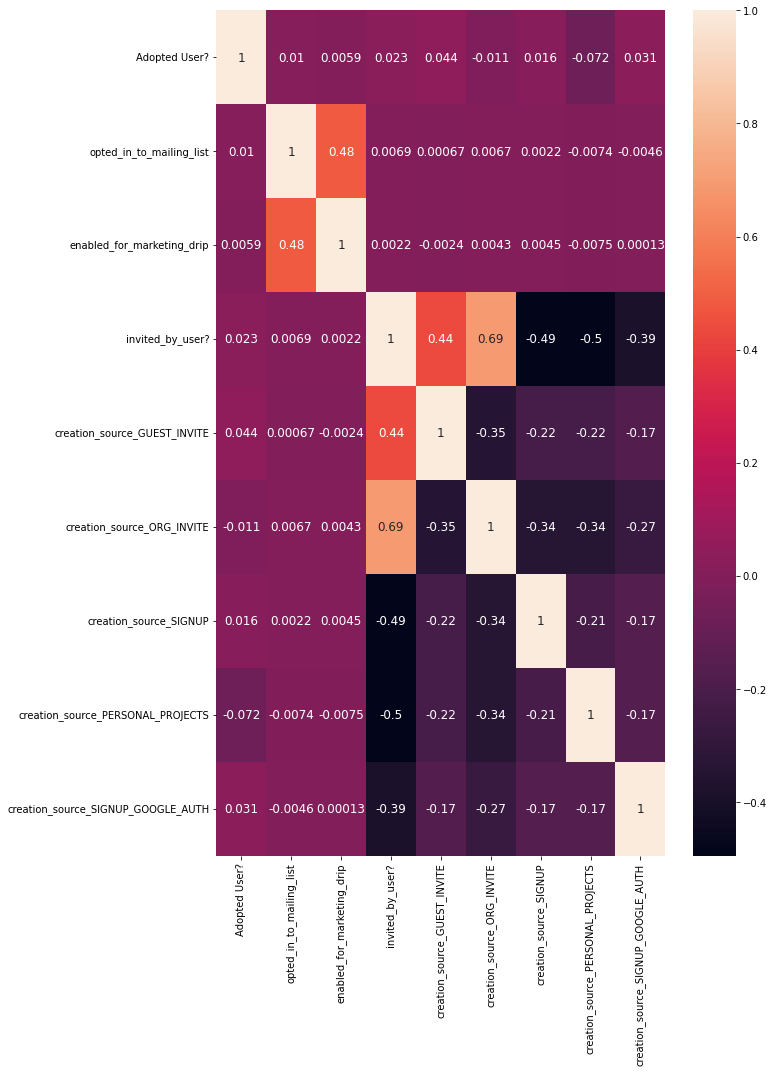

In [93]:
f, ax = plt.subplots(figsize=(11, 15)) 

sns.heatmap(original.corr(), annot = True, annot_kws = {"size": 12})

<div class="alert alert-success">
It seems like the feature importance ranking nicely reflects what we observe in the correlation matrix with 'creation_source_PERSONAL_PROJECTS' feature having the highest correlation with the target feature of 'Adopted User?'.
</div>